# Task 3.1: Audio Analysis

We will be detecting which of the audios given were the most suspicious by comparing all of their maximum magnitude for ultrasonic range. Then, we will plot a graph to see its Amplitude against Time, and then demodulating that audio file such that we can hear the hidden code.

1. Import all necessary libraries and audio files

In [67]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# List of audio files
audio_files = [
    '../exercise3/Ex3_sound1.wav',
    '../exercise3/Ex3_sound2.wav',
    '../exercise3/Ex3_sound3.wav',
    '../exercise3/Ex3_sound4.wav'
]

2. Set a carrier frequency, and the threshold for suspicious ultrasonic frequencies

In [68]:
# Carrier frequency
carrier_freq = 19000

# Threshold for detecting suspicious ultrasonic frequencies
ultrasonic_min = 18000
ultrasonic_max = 20000

3. Make a function to analyse each of the audio files' maximum ultrasonic frequency. Return the most suspicious audio file as the one with the highest magnitude.

In [69]:
# self written code start
def analyse_and_find_highest_magnitude(audio_files):
    max_magnitude = 0
    most_suspicious_file = None

    for file in audio_files:
        print(f"Processing file: {file}")
        
        # Load the audio file
        wave, sr = librosa.load(file, sr=None)
        
        # Compute the spectrum
        fft = np.fft.fft(wave, n=len(wave) * 4)  # Zero-padding for better resolution
        frequencies = np.fft.fftfreq(len(fft), d=1/sr)
        magnitude = np.abs(fft)
        
        # Check for ultrasonic frequencies
        ultrasonic_indices = (frequencies >= 18000) & (frequencies <= 20000)
        current_max = np.max(magnitude[ultrasonic_indices])
        print(f"Max magnitude in ultrasonic range for {file}: {current_max}")
        print("----------------------------------------------------------------------------")
        
        # Update the file with the highest magnitude
        if current_max > max_magnitude:
            max_magnitude = current_max
            most_suspicious_file = file

    # Print and return the file with the highest ultrasonic magnitude
    if most_suspicious_file:
        print(f"The file with the highest ultrasonic magnitude is: {most_suspicious_file}")
        print(f"Max magnitude: {max_magnitude}")
        print("============================================================================")
    else:
        print("No ultrasonic data detected in the given files.")

    return most_suspicious_file



4. Run the function we made in step 3 through all of our audio files 

In [70]:
# Run the function and identify the most suspicious file
suspicious_file = analyse_and_find_highest_magnitude(audio_files)

Processing file: ../exercise3/Ex3_sound1.wav
Max magnitude in ultrasonic range for ../exercise3/Ex3_sound1.wav: 95.48660436249195
----------------------------------------------------------------------------
Processing file: ../exercise3/Ex3_sound2.wav
Max magnitude in ultrasonic range for ../exercise3/Ex3_sound2.wav: 0.03929395571018589
----------------------------------------------------------------------------
Processing file: ../exercise3/Ex3_sound3.wav
Max magnitude in ultrasonic range for ../exercise3/Ex3_sound3.wav: 0.049441157728912735
----------------------------------------------------------------------------
Processing file: ../exercise3/Ex3_sound4.wav
Max magnitude in ultrasonic range for ../exercise3/Ex3_sound4.wav: 510.8441211046861
----------------------------------------------------------------------------
The file with the highest ultrasonic magnitude is: ../exercise3/Ex3_sound4.wav
Max magnitude: 510.8441211046861


5. Make a function to plot the suspicious audio's Amplitude against Time, and demodulate it.

Demodulating the most suspicious file: ../exercise3/Ex3_sound4.wav


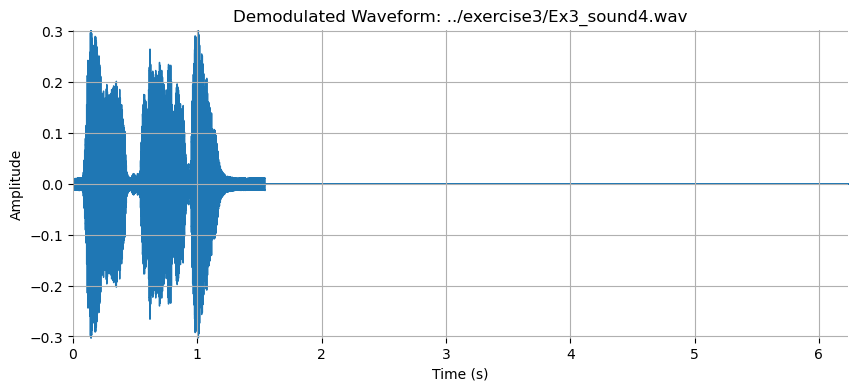

Original Audio:


Demodulated Audio:


In [71]:

# If a suspicious file is found, analyse and demodulate it
if suspicious_file:
    print(f"Demodulating the most suspicious file: {suspicious_file}")
    
    # Load the suspicious audio
    wave, sr = librosa.load(suspicious_file, sr=None)
    duration = len(wave) / sr
    t = np.linspace(0, duration, len(wave), endpoint=False)
    
    # Generate the carrier wave
    carrier_wave = np.cos(2 * np.pi * carrier_freq * t)
    
    # Demodulate the wave
    demodulated_wave = wave * carrier_wave
    
    # Low-pass filter to remove high-frequency components after demodulation
    fft_demodulated = np.fft.fft(demodulated_wave)
    frequencies_demodulated = np.fft.fftfreq(len(demodulated_wave), d=1/sr)
    low_pass_indices = np.abs(frequencies_demodulated) <= 4000
    fft_demodulated[~low_pass_indices] = 0
    demodulated_wave = np.fft.ifft(fft_demodulated).real
    
    # Plot and play the demodulated audio
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(demodulated_wave, sr=sr)
    plt.title(f'Demodulated Waveform: {suspicious_file}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    print("Original Audio:")
    ipd.display(ipd.Audio(data=suspicious_file, rate=sr))

    
    print("Demodulated Audio:")
    ipd.display(ipd.Audio(data=demodulated_wave, rate=sr))
# self written code end
